# 모델링

## 데이터 임포트

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split  

### sqlite3으로 db에서 데이터를 가져온다

In [2]:
conn = sqlite3.connect('data.db')
cur = conn.cursor()

In [3]:
gold = cur.execute('SELECT * FROM gold')
gold = pd.DataFrame(gold)
gold.columns = ['date','price_gold']

In [4]:
btc = cur.execute('SELECT * FROM bit')
btc = pd.DataFrame(btc)
btc.columns = ['date','price_btc']

In [5]:
basemoneyrate = cur.execute('SELECT * FROM basemoneyrate')
basemoneyrate = pd.DataFrame(basemoneyrate)
basemoneyrate.columns = ['date','bok','call']

In [6]:
index_list = cur.execute('SELECT * FROM index_5')
index_list = pd.DataFrame(index_list)
index_list.columns = ['date','kospi','kosdaq','sp500','nasdaq','exchangerate']

In [7]:
indicator = cur.execute('SELECT * FROM indicator')
indicator = pd.DataFrame(indicator)
indicator.columns = ['date','cpi','phi','esi']

In [8]:
gdp = cur.execute('SELECT * FROM GDP')
gdp =pd.DataFrame(gdp)
gdp.columns = ['date','gdp']

### 데이터셋 만들기

In [9]:
df1 = pd.merge(gold,btc,left_on='date',right_on='date')
df2 = pd.merge(index_list,basemoneyrate,left_on='date',right_on='date')
data = pd.merge(df2,df1,left_on='date',right_on='date')
data.drop('date',axis=1,inplace=True)

In [10]:
data

,date,kospi,kosdaq,sp500,nasdaq,exchangerate,bok,call,price_gold,price_btc
0,2020-01-02,2175.17,674.02,3257.85,9092.19,1157.35,1.25,1.300,56860.0,8046000.0
1,2020-01-03,2176.46,669.93,3234.85,9020.77,1164.95,1.25,1.270,57850.0,8472000.0
2,2020-01-06,2155.07,655.31,3246.28,9071.47,1166.94,1.25,1.290,59420.0,8855000.0
3,2020-01-07,2175.54,663.44,3237.18,9068.58,1167.30,1.25,1.270,58750.0,9391000.0
4,2020-01-08,2151.31,640.94,3253.05,9129.24,1162.25,1.25,1.250,60010.0,9096000.0
...,...,...,...,...,...,...,...,...,...,...
553,2022-04-25,2657.13,899.84,4296.12,13004.85,1250.10,1.50,1.418,76790.0,50633000.0
554,2022-04-26,2668.31,911.16,4175.20,12490.74,1260.67,1.50,1.385,76550.0,48710000.0
555,2022-04-27,2639.06,896.18,4183.96,12488.93,1266.27,1.50,1.359,77150.0,49918000.0
556,2022-04-28,2667.49,892.22,4287.50,12871.53,1272.11,1.50,1.347,76780.0,50549000.0


In [10]:
data.drop('call',inplace=True,axis=1)

In [11]:
data

,kospi,kosdaq,sp500,nasdaq,exchangerate,bok,price_gold,price_btc
0,2175.17,674.02,3257.85,9092.19,1157.35,1.25,56860.0,8046000.0
1,2176.46,669.93,3234.85,9020.77,1164.95,1.25,57850.0,8472000.0
2,2155.07,655.31,3246.28,9071.47,1166.94,1.25,59420.0,8855000.0
3,2175.54,663.44,3237.18,9068.58,1167.30,1.25,58750.0,9391000.0
4,2151.31,640.94,3253.05,9129.24,1162.25,1.25,60010.0,9096000.0
...,...,...,...,...,...,...,...,...
553,2657.13,899.84,4296.12,13004.85,1250.10,1.50,76790.0,50633000.0
554,2668.31,911.16,4175.20,12490.74,1260.67,1.50,76550.0,48710000.0
555,2639.06,896.18,4183.96,12488.93,1266.27,1.50,77150.0,49918000.0
556,2667.49,892.22,4287.50,12871.53,1272.11,1.50,76780.0,50549000.0


In [12]:
data.to_csv('dataset.csv',index=False)

### 데이터셋 분할

In [13]:
target = data['price_gold']
feature = data.drop('price_gold', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [16]:
model1 = LinearRegression()

In [17]:
model1.fit(X_train,y_train)

LinearRegression()

In [18]:
model1.feature_names_in_

array(['kospi', 'kosdaq', 'sp500', 'nasdaq', 'exchangerate', 'bok',
       'price_btc'], dtype=object)

In [19]:
model1.coef_

array([-1.66274672e+01,  7.51319994e+01,  2.47804628e+00, -9.87517626e-01,
        3.93968488e+01,  1.46818760e+02, -2.89878904e-05])

In [20]:
model1.score(X_test,y_test)

0.5747743613728167

In [21]:
model2 = XGBRegressor(random_state=17)

In [22]:
model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=17,
             reg_alpha=0, reg_lambda=1, ...)

In [23]:
model2.score(X_test,y_test)

0.9546759889151649

In [24]:
pred = model2.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(y_test,pred)

712.1307198660714

In [27]:
from lightgbm import LGBMRegressor

In [28]:
model3 = LGBMRegressor()

In [29]:
model3.fit(X_train,y_train)

LGBMRegressor()

In [30]:
model3.score(X_test,y_test)

0.9463400459695528

In [31]:
pred1 = model3.predict(X_test)

In [32]:
import pickle
with open('model1.pickle','wb') as file:
    pickle.dump(model3,file)

In [33]:
import shap

In [34]:
explainer = shap.Explainer(model3)

In [35]:
shap_values = explainer(feature)

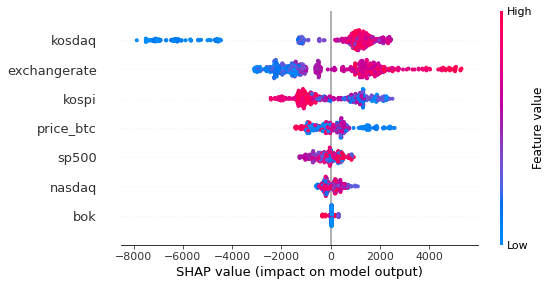

In [36]:
shap.plots.beeswarm(shap_values)